In [1]:
# import standard libraries
%matplotlib inline
import numpy as np
import pandas as pd
import os
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "..", "data", "preprocessed"))

In [3]:
# read the data
df = pd.read_csv("2.0-sh-data-preprocessed.csv", encoding = "ISO-8859-1")

In [4]:
# check the data
df.head()

,tweet,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,2
2,@swonderlin Can not wait for #iPad 2 also. The...,2
3,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,2


## Text Preprocessing

In [5]:
# import required libraries
import nltk
import re
from textblob import TextBlob
import unidecode
import enchant

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakib@ibm.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakib@ibm.com/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sakib@ibm.com/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/sakib@ibm.com/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [6]:
# got list from http://www.tysto.com/uk-us-spelling-list.html
normalized_dict = {
    "accessorise" : "accessorize",
    "accessorised" : "accessorized",
    "accessorises" : "accessorizes",
    "accessorising" : "accessorizing",
    "acclimatisation" : "acclimatization",
    "acclimatise" : "acclimatize",
    "acclimatised" : "acclimatized",
    "acclimatises" : "acclimatizes",
    "acclimatising" : "acclimatizing",
    "accoutrements" : "accouterments",
    "aeon" : "eon",
    "aeons" : "eons",
    "aerogramme" : "aerogram",
    "aerogrammes" : "aerograms",
    "aeroplane" : "airplane",
    "aeroplanes" : "airplanes",
    "aesthete" : "esthete",
    "aesthetes" : "esthetes",
    "aesthetic" : "esthetic",
    "aesthetically" : "esthetically",
    "aesthetics" : "esthetics",
    "aetiology" : "etiology",
    "ageing" : "aging",
    "aggrandisement" : "aggrandizement",
    "agonise" : "agonize",
    "agonised" : "agonized",
    "agonises" : "agonizes",
    "agonising" : "agonizing",
    "agonisingly" : "agonizingly",
    "almanack" : "almanac",
    "almanacks" : "almanacs",
    "aluminium" : "aluminum",
    "amortisable" : "amortizable",
    "amortisation" : "amortization",
    "amortisations" : "amortizations",
    "amortise" : "amortize",
    "amortised" : "amortized",
    "amortises" : "amortizes",
    "amortising" : "amortizing",
    "amphitheatre" : "amphitheater",
    "amphitheatres" : "amphitheaters",
    "anaemia" : "anemia",
    "anaemic" : "anemic",
    "anaesthesia" : "anesthesia",
    "anaesthetic" : "anesthetic",
    "anaesthetics" : "anesthetics",
    "anaesthetise" : "anesthetize",
    "anaesthetised" : "anesthetized",
    "anaesthetises" : "anesthetizes",
    "anaesthetising" : "anesthetizing",
    "anaesthetist" : "anesthetist",
    "anaesthetists" : "anesthetists",
    "anaesthetize" : "anesthetize",
    "anaesthetized" : "anesthetized",
    "anaesthetizes" : "anesthetizes",
    "anaesthetizing" : "anesthetizing",
    "analogue" : "analog",
    "analogues" : "analogs",
    "analyse" : "analyze",
    "analysed" : "analyzed",
    "analyses" : "analyzes",
    "analysing" : "analyzing",
    "anglicise" : "anglicize",
    "anglicised" : "anglicized",
    "anglicises" : "anglicizes",
    "anglicising" : "anglicizing",
    "annualised" : "annualized",
    "antagonise" : "antagonize",
    "antagonised" : "antagonized",
    "antagonises" : "antagonizes",
    "antagonising" : "antagonizing",
    "apologise" : "apologize",
    "apologised" : "apologized",
    "apologises" : "apologizes",
    "apologising" : "apologizing",
    "appal" : "appall",
    "appals" : "appalls",
    "appetiser" : "appetizer",
    "appetisers" : "appetizers",
    "appetising" : "appetizing",
    "appetisingly" : "appetizingly",
    "arbour" : "arbor",
    "arbours" : "arbors",
    "archaeological" : "archeological",
    "archaeologically" : "archeologically",
    "archaeologist" : "archeologist",
    "archaeologists" : "archeologists",
    "archaeology" : "archeology",
    "ardour" : "ardor",
    "armour" : "armor",
    "armoured" : "armored",
    "armourer" : "armorer",
    "armourers" : "armorers",
    "armouries" : "armories",
    "armoury" : "armory",
    "artefact" : "artifact",
    "artefacts" : "artifacts",
    "authorise" : "authorize",
    "authorised" : "authorized",
    "authorises" : "authorizes",
    "authorising" : "authorizing",
    "axe" : "ax",
    "backpedalled" : "backpedaled",
    "backpedalling" : "backpedaling",
    "bannister" : "banister",
    "bannisters" : "banisters",
    "baptise" : "baptize",
    "baptised" : "baptized",
    "baptises" : "baptizes",
    "baptising" : "baptizing",
    "bastardise" : "bastardize",
    "bastardised" : "bastardized",
    "bastardises" : "bastardizes",
    "bastardising" : "bastardizing",
    "battleaxe" : "battleax",
    "baulk" : "balk",
    "baulked" : "balked",
    "baulking" : "balking",
    "baulks" : "balks",
    "bedevilled" : "bedeviled",
    "bedevilling" : "bedeviling",
    "behaviour" : "behavior",
    "behavioural" : "behavioral",
    "behaviourism" : "behaviorism",
    "behaviourist" : "behaviorist",
    "behaviourists" : "behaviorists",
    "behaviours" : "behaviors",
    "behove" : "behoove",
    "behoved" : "behooved",
    "behoves" : "behooves",
    "bejewelled" : "bejeweled",
    "belabour" : "belabor",
    "belaboured" : "belabored",
    "belabouring" : "belaboring",
    "belabours" : "belabors",
    "bevelled" : "beveled",
    "bevvies" : "bevies",
    "bevvy" : "bevy",
    "biassed" : "biased",
    "biassing" : "biasing",
    "bingeing" : "binging",
    "bougainvillaea" : "bougainvillea",
    "bougainvillaeas" : "bougainvilleas",
    "bowdlerise" : "bowdlerize",
    "bowdlerised" : "bowdlerized",
    "bowdlerises" : "bowdlerizes",
    "bowdlerising" : "bowdlerizing",
    "breathalyse" : "breathalyze",
    "breathalysed" : "breathalyzed",
    "breathalyser" : "breathalyzer",
    "breathalysers" : "breathalyzers",
    "breathalyses" : "breathalyzes",
    "breathalysing" : "breathalyzing",
    "brutalise" : "brutalize",
    "brutalised" : "brutalized",
    "brutalises" : "brutalizes",
    "brutalising" : "brutalizing",
    "buses" : "busses",
    "busing" : "bussing",
    "caesarean" : "cesarean",
    "caesareans" : "cesareans",
    "calibre" : "caliber",
    "calibres" : "calibers",
    "calliper" : "caliper",
    "callipers" : "calipers",
    "callisthenics" : "calisthenics",
    "canalise" : "canalize",
    "canalised" : "canalized",
    "canalises" : "canalizes",
    "canalising" : "canalizing",
    "cancellation" : "cancelation",
    "cancellations" : "cancelations",
    "cancelled" : "canceled",
    "cancelling" : "canceling",
    "candour" : "candor",
    "cannibalise" : "cannibalize",
    "cannibalised" : "cannibalized",
    "cannibalises" : "cannibalizes",
    "cannibalising" : "cannibalizing",
    "canonise" : "canonize",
    "canonised" : "canonized",
    "canonises" : "canonizes",
    "canonising" : "canonizing",
    "capitalise" : "capitalize",
    "capitalised" : "capitalized",
    "capitalises" : "capitalizes",
    "capitalising" : "capitalizing",
    "caramelise" : "caramelize",
    "caramelised" : "caramelized",
    "caramelises" : "caramelizes",
    "caramelising" : "caramelizing",
    "carbonise" : "carbonize",
    "carbonised" : "carbonized",
    "carbonises" : "carbonizes",
    "carbonising" : "carbonizing",
    "carolled" : "caroled",
    "carolling" : "caroling",
    "catalogue " : "catalog ",
    "catalogue." : "catalog.",
    "catalogued" : "cataloged",
    "catalogues" : "catalogs",
    "cataloguing" : "cataloging",
    "catalyse" : "catalyze",
    "catalysed" : "catalyzed",
    "catalyses" : "catalyzes",
    "catalysing" : "catalyzing",
    "categorise" : "categorize",
    "categorised" : "categorized",
    "categorises" : "categorizes",
    "categorising" : "categorizing",
    "cauterise" : "cauterize",
    "cauterised" : "cauterized",
    "cauterises" : "cauterizes",
    "cauterising" : "cauterizing",
    "cavilled" : "caviled",
    "cavilling" : "caviling",
    "centigramme" : "centigram",
    "centigrammes" : "centigrams",
    "centilitre" : "centiliter",
    "centilitres" : "centiliters",
    "centimetre" : "centimeter",
    "centimetres" : "centimeters",
    "centralise" : "centralize",
    "centralised" : "centralized",
    "centralises" : "centralizes",
    "centralising" : "centralizing",
    "centre" : "center",
    "centred" : "centered",
    "centrefold" : "centerfold",
    "centrefolds" : "centerfolds",
    "centrepiece" : "centerpiece",
    "centrepieces" : "centerpieces",
    "centres" : "centers",
    "channelled" : "channeled",
    "channelling" : "channeling",
    "characterise" : "characterize",
    "characterised" : "characterized",
    "characterises" : "characterizes",
    "characterising" : "characterizing",
    "cheque" : "check",
    "chequebook" : "checkbook",
    "chequebooks" : "checkbooks",
    "chequered" : "checkered",
    "cheques" : "checks",
    "chilli" : "chili",
    "chimaera" : "chimera",
    "chimaeras" : "chimeras",
    "chiselled" : "chiseled",
    "chiselling" : "chiseling",
    "circularise" : "circularize",
    "circularised" : "circularized",
    "circularises" : "circularizes",
    "circularising" : "circularizing",
    "civilise" : "civilize",
    "civilised" : "civilized",
    "civilises" : "civilizes",
    "civilising" : "civilizing",
    "clamour" : "clamor",
    "clamoured" : "clamored",
    "clamouring" : "clamoring",
    "clamours" : "clamors",
    "clangour" : "clangor",
    "clarinettist" : "clarinetist",
    "clarinettists" : "clarinetists",
    "collectivise" : "collectivize",
    "collectivised" : "collectivized",
    "collectivises" : "collectivizes",
    "collectivising" : "collectivizing",
    "colonisation" : "colonization",
    "colonise" : "colonize",
    "colonised" : "colonized",
    "coloniser" : "colonizer",
    "colonisers" : "colonizers",
    "colonises" : "colonizes",
    "colonising" : "colonizing",
    "colour" : "color",
    "colourant" : "colorant",
    "colourants" : "colorants",
    "coloured" : "colored",
    "coloureds" : "coloreds",
    "colourful" : "colorful",
    "colourfully" : "colorfully",
    "colouring" : "coloring",
    "colourize" : "colorize",
    "colourized" : "colorized",
    "colourizes" : "colorizes",
    "colourizing" : "colorizing",
    "colourless" : "colorless",
    "colours" : "colors",
    "commercialise" : "commercialize",
    "commercialised" : "commercialized",
    "commercialises" : "commercializes",
    "commercialising" : "commercializing",
    "compartmentalise" : "compartmentalize",
    "compartmentalised" : "compartmentalized",
    "compartmentalises" : "compartmentalizes",
    "compartmentalising" : "compartmentalizing",
    "computerise" : "computerize",
    "computerised" : "computerized",
    "computerises" : "computerizes",
    "computerising" : "computerizing",
    "conceptualise" : "conceptualize",
    "conceptualised" : "conceptualized",
    "conceptualises" : "conceptualizes",
    "conceptualising" : "conceptualizing",
    "connexion" : "connection",
    "connexions" : "connections",
    "contextualise" : "contextualize",
    "contextualised" : "contextualized",
    "contextualises" : "contextualizes",
    "contextualising" : "contextualizing",
    "cosier" : "cozier",
    "cosies" : "cozies",
    "cosiest" : "coziest",
    "cosily" : "cozily",
    "cosiness" : "coziness",
    "cosy" : "cozy",
    "councillor" : "councilor",
    "councillors" : "councilors",
    "counselled" : "counseled",
    "counselling" : "counseling",
    "counsellor" : "counselor",
    "counsellors" : "counselors",
    "crenellated" : "crenelated",
    "criminalise" : "criminalize",
    "criminalised" : "criminalized",
    "criminalises" : "criminalizes",
    "criminalising" : "criminalizing",
    "criticise" : "criticize",
    "criticised" : "criticized",
    "criticises" : "criticizes",
    "criticising" : "criticizing",
    "crueller" : "crueler",
    "cruellest" : "cruelest",
    "crystallisation" : "crystallization",
    "crystallise" : "crystallize",
    "crystallised" : "crystallized",
    "crystallises" : "crystallizes",
    "crystallising" : "crystallizing",
    "cudgelled" : "cudgeled",
    "cudgelling" : "cudgeling",
    "customise" : "customize",
    "customised" : "customized",
    "customises" : "customizes",
    "customising" : "customizing",
    "cypher" : "cipher",
    "cyphers" : "ciphers",
    "decentralisation" : "decentralization",
    "decentralise" : "decentralize",
    "decentralised" : "decentralized",
    "decentralises" : "decentralizes",
    "decentralising" : "decentralizing",
    "decriminalisation" : "decriminalization",
    "decriminalise" : "decriminalize",
    "decriminalised" : "decriminalized",
    "decriminalises" : "decriminalizes",
    "decriminalising" : "decriminalizing",
    "defence" : "defense",
    "defenceless" : "defenseless",
    "defences" : "defenses",
    "dehumanisation" : "dehumanization",
    "dehumanise" : "dehumanize",
    "dehumanised" : "dehumanized",
    "dehumanises" : "dehumanizes",
    "dehumanising" : "dehumanizing",
    "demeanour" : "demeanor",
    "demilitarisation" : "demilitarization",
    "demilitarise" : "demilitarize",
    "demilitarised" : "demilitarized",
    "demilitarises" : "demilitarizes",
    "demilitarising" : "demilitarizing",
    "demobilisation" : "demobilization",
    "demobilise" : "demobilize",
    "demobilised" : "demobilized",
    "demobilises" : "demobilizes",
    "demobilising" : "demobilizing",
    "democratisation" : "democratization",
    "democratise" : "democratize",
    "democratised" : "democratized",
    "democratises" : "democratizes",
    "democratising" : "democratizing",
    "demonise" : "demonize",
    "demonised" : "demonized",
    "demonises" : "demonizes",
    "demonising" : "demonizing",
    "demoralisation" : "demoralization",
    "demoralise" : "demoralize",
    "demoralised" : "demoralized",
    "demoralises" : "demoralizes",
    "demoralising" : "demoralizing",
    "denationalisation" : "denationalization",
    "denationalise" : "denationalize",
    "denationalised" : "denationalized",
    "denationalises" : "denationalizes",
    "denationalising" : "denationalizing",
    "deodorise" : "deodorize",
    "deodorised" : "deodorized",
    "deodorises" : "deodorizes",
    "deodorising" : "deodorizing",
    "depersonalise" : "depersonalize",
    "depersonalised" : "depersonalized",
    "depersonalises" : "depersonalizes",
    "depersonalising" : "depersonalizing",
    "deputise" : "deputize",
    "deputised" : "deputized",
    "deputises" : "deputizes",
    "deputising" : "deputizing",
    "desensitisation" : "desensitization",
    "desensitise" : "desensitize",
    "desensitised" : "desensitized",
    "desensitises" : "desensitizes",
    "desensitising" : "desensitizing",
    "destabilisation" : "destabilization",
    "destabilise" : "destabilize",
    "destabilised" : "destabilized",
    "destabilises" : "destabilizes",
    "destabilising" : "destabilizing",
    "dialled" : "dialed",
    "dialling" : "dialing",
    "dialogue" : "dialog",
    "dialogues" : "dialogs",
    "diarrhoea" : "diarrhea",
    "digitise" : "digitize",
    "digitised" : "digitized",
    "digitises" : "digitizes",
    "digitising" : "digitizing",
    "disc " : "disk ",
    "disc." : "disk.",
    "disc : " : "disk : ",
    "disc?" : "disk?",
    "disc;" : "disk;",
    "disc-" : "disk-",
    "discolour" : "discolor",
    "discoloured" : "discolored",
    "discolouring" : "discoloring",
    "discolours" : "discolors",
    "discs" : "disks",
    "discy" : "disky",
    "disembowelled" : "disemboweled",
    "disembowelling" : "disemboweling",
    "disfavour" : "disfavor",
    "dishevelled" : "disheveled",
    "dishonour" : "dishonor",
    "dishonourable" : "dishonorable",
    "dishonourably" : "dishonorably",
    "dishonoured" : "dishonored",
    "dishonouring" : "dishonoring",
    "dishonours" : "dishonors",
    "disorganisation" : "disorganization",
    "disorganised" : "disorganized",
    "distil" : "distill",
    "distils" : "distills",
    "dramatisation" : "dramatization",
    "dramatisations" : "dramatizations",
    "dramatise" : "dramatize",
    "dramatised" : "dramatized",
    "dramatises" : "dramatizes",
    "dramatising" : "dramatizing",
    "draught" : "draft",
    "draughtboard" : "draftboard",
    "draughtboards" : "draftboards",
    "draughtier" : "draftier",
    "draughtiest" : "draftiest",
    "draughts" : "drafts",
    "draughtsman" : "draftsman",
    "draughtsmanship" : "draftsmanship",
    "draughtsmen" : "draftsmen",
    "draughtswoman" : "draftswoman",
    "draughtswomen" : "draftswomen",
    "draughty" : "drafty",
    "drivelled" : "driveled",
    "drivelling" : "driveling",
    "duelled" : "dueled",
    "duelling" : "dueling",
    "economise" : "economize",
    "economised" : "economized",
    "economises" : "economizes",
    "economising" : "economizing",
    "edoema" : "edema",
    "editorialise" : "editorialize",
    "editorialised" : "editorialized",
    "editorialises" : "editorializes",
    "editorialising" : "editorializing",
    "empathise" : "empathize",
    "empathised" : "empathized",
    "empathises" : "empathizes",
    "empathising" : "empathizing",
    "emphasise" : "emphasize",
    "emphasised" : "emphasized",
    "emphasises" : "emphasizes",
    "emphasising" : "emphasizing",
    "enamelled" : "enameled",
    "enamelling" : "enameling",
    "enamoured" : "enamored",
    "encyclopaedia" : "encyclopedia",
    "encyclopaedias" : "encyclopedias",
    "encyclopaedic" : "encyclopedic",
    "endeavour" : "endeavor",
    "endeavoured" : "endeavored",
    "endeavouring" : "endeavoring",
    "endeavours" : "endeavors",
    "energise" : "energize",
    "energised" : "energized",
    "energises" : "energizes",
    "energising" : "energizing",
    "enrol" : "enroll",
    "enrols" : "enrolls",
    "enthral" : "enthrall",
    "enthrals" : "enthralls",
    "epaulette" : "epaulet",
    "epaulettes" : "epaulets",
    "epicentre" : "epicenter",
    "epicentres" : "epicenters",
    "epilogue" : "epilog",
    "epilogues" : "epilogs",
    "epitomise" : "epitomize",
    "epitomised" : "epitomized",
    "epitomises" : "epitomizes",
    "epitomising" : "epitomizing",
    "equalisation" : "equalization",
    "equalise" : "equalize",
    "equalised" : "equalized",
    "equaliser" : "equalizer",
    "equalisers" : "equalizers",
    "equalises" : "equalizes",
    "equalising" : "equalizing",
    "eulogise" : "eulogize",
    "eulogised" : "eulogized",
    "eulogises" : "eulogizes",
    "eulogising" : "eulogizing",
    "evangelise" : "evangelize",
    "evangelised" : "evangelized",
    "evangelises" : "evangelizes",
    "evangelising" : "evangelizing",
    "exorcise" : "exorcize",
    "exorcised" : "exorcized",
    "exorcises" : "exorcizes",
    "exorcising" : "exorcizing",
    "extemporisation" : "extemporization",
    "extemporise" : "extemporize",
    "extemporised" : "extemporized",
    "extemporises" : "extemporizes",
    "extemporising" : "extemporizing",
    "externalisation" : "externalization",
    "externalisations" : "externalizations",
    "externalise" : "externalize",
    "externalised" : "externalized",
    "externalises" : "externalizes",
    "externalising" : "externalizing",
    "factorise" : "factorize",
    "factorised" : "factorized",
    "factorises" : "factorizes",
    "factorising" : "factorizing",
    "faecal" : "fecal",
    "faeces" : "feces",
    "familiarisation" : "familiarization",
    "familiarise" : "familiarize",
    "familiarised" : "familiarized",
    "familiarises" : "familiarizes",
    "familiarising" : "familiarizing",
    "fantasise" : "fantasize",
    "fantasised" : "fantasized",
    "fantasises" : "fantasizes",
    "fantasising" : "fantasizing",
    "favour" : "favor",
    "favourable" : "favorable",
    "favourably" : "favorably",
    "favoured" : "favored",
    "favouring" : "favoring",
    "favourite" : "favorite",
    "favourites" : "favorites",
    "favouritism" : "favoritism",
    "favours" : "favors",
    "feminise" : "feminize",
    "feminised" : "feminized",
    "feminises" : "feminizes",
    "feminising" : "feminizing",
    "fertilisation" : "fertilization",
    "fertilise" : "fertilize",
    "fertilised" : "fertilized",
    "fertiliser" : "fertilizer",
    "fertilisers" : "fertilizers",
    "fertilises" : "fertilizes",
    "fertilising" : "fertilizing",
    "fervour" : "fervor",
    "fibre" : "fiber",
    "fibreglass" : "fiberglass",
    "fibres" : "fibers",
    "fictionalisation" : "fictionalization",
    "fictionalisations" : "fictionalizations",
    "fictionalise" : "fictionalize",
    "fictionalised" : "fictionalized",
    "fictionalises" : "fictionalizes",
    "fictionalising" : "fictionalizing",
    "fillet" : "filet",
    "filleted" : "fileted",
    "filleting" : "fileting",
    "fillets" : "filets",
    "finalisation" : "finalization",
    "finalise" : "finalize",
    "finalised" : "finalized",
    "finalises" : "finalizes",
    "finalising" : "finalizing",
    "flautist" : "flutist",
    "flautists" : "flutists",
    "flavour" : "flavor",
    "flavoured" : "flavored",
    "flavouring" : "flavoring",
    "flavourings" : "flavorings",
    "flavourless" : "flavorless",
    "flavours" : "flavors",
    "flavoursome" : "flavorsome",
    "flyer/flier" : "flier/flyer",
    "foetal" : "fetal",
    "foetid" : "fetid",
    "foetus" : "fetus",
    "foetuses" : "fetuses",
    "formalisation" : "formalization",
    "formalise" : "formalize",
    "formalised" : "formalized",
    "formalises" : "formalizes",
    "formalising" : "formalizing",
    "fossilisation" : "fossilization",
    "fossilise" : "fossilize",
    "fossilised" : "fossilized",
    "fossilises" : "fossilizes",
    "fossilising" : "fossilizing",
    "fraternisation" : "fraternization",
    "fraternise" : "fraternize",
    "fraternised" : "fraternized",
    "fraternises" : "fraternizes",
    "fraternising" : "fraternizing",
    "fulfil" : "fulfill",
    "fulfilment" : "fulfillment",
    "fulfils" : "fulfills",
    "funnelled" : "funneled",
    "funnelling" : "funneling",
    "galvanise" : "galvanize",
    "galvanised" : "galvanized",
    "galvanises" : "galvanizes",
    "galvanising" : "galvanizing",
    "gambolled" : "gamboled",
    "gambolling" : "gamboling",
    "gaol" : "jail",
    "gaolbird" : "jailbird",
    "gaolbirds" : "jailbirds",
    "gaolbreak" : "jailbreak",
    "gaolbreaks" : "jailbreaks",
    "gaoled" : "jailed",
    "gaoler" : "jailer",
    "gaolers" : "jailers",
    "gaoling" : "jailing",
    "gaols" : "jails",
    "gases" : "gasses",
    "gauge" : "gage",
    "gauged" : "gaged",
    "gauges" : "gages",
    "gauging" : "gaging",
    "generalisation" : "generalization",
    "generalisations" : "generalizations",
    "generalise" : "generalize",
    "generalised" : "generalized",
    "generalises" : "generalizes",
    "generalising" : "generalizing",
    "ghettoise" : "ghettoize",
    "ghettoised" : "ghettoized",
    "ghettoises" : "ghettoizes",
    "ghettoising" : "ghettoizing",
    "gipsies" : "gypsies",
    "glamorise" : "glamorize",
    "glamorised" : "glamorized",
    "glamorises" : "glamorizes",
    "glamorising" : "glamorizing",
    "glamour" : "glamor",
    "globalisation" : "globalization",
    "globalise" : "globalize",
    "globalised" : "globalized",
    "globalises" : "globalizes",
    "globalising" : "globalizing",
    "glueing" : "gluing",
    "goitre" : "goiter",
    "goitres" : "goiters",
    "gonorrhoea" : "gonorrhea",
    "gramme" : "gram",
    "grammes" : "grams",
    "gravelled" : "graveled",
    "grey" : "gray",
    "greyed" : "grayed",
    "greying" : "graying",
    "greyish" : "grayish",
    "greyness" : "grayness",
    "greys" : "grays",
    "grovelled" : "groveled",
    "grovelling" : "groveling",
    "groyne" : "groin",
    "groynes" : "groins",
    "gruelling" : "grueling",
    "gruellingly" : "gruelingly",
    "gryphon" : "griffin",
    "gryphons" : "griffins",
    "gynaecological" : "gynecological",
    "gynaecologist" : "gynecologist",
    "gynaecologists" : "gynecologists",
    "gynaecology" : "gynecology",
    "haematological" : "hematological",
    "haematologist" : "hematologist",
    "haematologists" : "hematologists",
    "haematology" : "hematology",
    "haemoglobin" : "hemoglobin",
    "haemophilia" : "hemophilia",
    "haemophiliac" : "hemophiliac",
    "haemophiliacs" : "hemophiliacs",
    "haemorrhage" : "hemorrhage",
    "haemorrhaged" : "hemorrhaged",
    "haemorrhages" : "hemorrhages",
    "haemorrhaging" : "hemorrhaging",
    "haemorrhoids" : "hemorrhoids",
    "harbour" : "harbor",
    "harboured" : "harbored",
    "harbouring" : "harboring",
    "harbours" : "harbors",
    "harmonisation" : "harmonization",
    "harmonise" : "harmonize",
    "harmonised" : "harmonized",
    "harmonises" : "harmonizes",
    "harmonising" : "harmonizing",
    "homoeopath" : "homeopath",
    "homoeopathic" : "homeopathic",
    "homoeopaths" : "homeopaths",
    "homoeopathy" : "homeopathy",
    "homogenise" : "homogenize",
    "homogenised" : "homogenized",
    "homogenises" : "homogenizes",
    "homogenising" : "homogenizing",
    "honour" : "honor",
    "honourable" : "honorable",
    "honourably" : "honorably",
    "honoured" : "honored",
    "honouring" : "honoring",
    "honours" : "honors",
    "hospitalisation" : "hospitalization",
    "hospitalise" : "hospitalize",
    "hospitalised" : "hospitalized",
    "hospitalises" : "hospitalizes",
    "hospitalising" : "hospitalizing",
    "humanise" : "humanize",
    "humanised" : "humanized",
    "humanises" : "humanizes",
    "humanising" : "humanizing",
    "humour" : "humor",
    "humoured" : "humored",
    "humouring" : "humoring",
    "humourless" : "humorless",
    "humours" : "humors",
    "hybridise" : "hybridize",
    "hybridised" : "hybridized",
    "hybridises" : "hybridizes",
    "hybridising" : "hybridizing",
    "hypnotise" : "hypnotize",
    "hypnotised" : "hypnotized",
    "hypnotises" : "hypnotizes",
    "hypnotising" : "hypnotizing",
    "hypothesise" : "hypothesize",
    "hypothesised" : "hypothesized",
    "hypothesises" : "hypothesizes",
    "hypothesising" : "hypothesizing",
    "idealisation" : "idealization",
    "idealise" : "idealize",
    "idealised" : "idealized",
    "idealises" : "idealizes",
    "idealising" : "idealizing",
    "idolise" : "idolize",
    "idolised" : "idolized",
    "idolises" : "idolizes",
    "idolising" : "idolizing",
    "immobilisation" : "immobilization",
    "immobilise" : "immobilize",
    "immobilised" : "immobilized",
    "immobiliser" : "immobilizer",
    "immobilisers" : "immobilizers",
    "immobilises" : "immobilizes",
    "immobilising" : "immobilizing",
    "immortalise" : "immortalize",
    "immortalised" : "immortalized",
    "immortalises" : "immortalizes",
    "immortalising" : "immortalizing",
    "immunisation" : "immunization",
    "immunise" : "immunize",
    "immunised" : "immunized",
    "immunises" : "immunizes",
    "immunising" : "immunizing",
    "impanelled" : "impaneled",
    "impanelling" : "impaneling",
    "imperilled" : "imperiled",
    "imperilling" : "imperiling",
    "individualise" : "individualize",
    "individualised" : "individualized",
    "individualises" : "individualizes",
    "individualising" : "individualizing",
    "industrialise" : "industrialize",
    "industrialised" : "industrialized",
    "industrialises" : "industrializes",
    "industrialising" : "industrializing",
    "inflexion" : "inflection",
    "inflexions" : "inflections",
    "initialise" : "initialize",
    "initialised" : "initialized",
    "initialises" : "initializes",
    "initialising" : "initializing",
    "initialled" : "initialed",
    "initialling" : "initialing",
    "instal" : "install",
    "instalment" : "installment",
    "instalments" : "installments",
    "instals" : "installs",
    "instil" : "instill",
    "instils" : "instills",
    "institutionalisation" : "institutionalization",
    "institutionalise" : "institutionalize",
    "institutionalised" : "institutionalized",
    "institutionalises" : "institutionalizes",
    "institutionalising" : "institutionalizing",
    "intellectualise" : "intellectualize",
    "intellectualised" : "intellectualized",
    "intellectualises" : "intellectualizes",
    "intellectualising" : "intellectualizing",
    "internalisation" : "internalization",
    "internalise" : "internalize",
    "internalised" : "internalized",
    "internalises" : "internalizes",
    "internalising" : "internalizing",
    "internationalisation" : "internationalization",
    "internationalise" : "internationalize",
    "internationalised" : "internationalized",
    "internationalises" : "internationalizes",
    "internationalising" : "internationalizing",
    "ionisation" : "ionization",
    "ionise" : "ionize",
    "ionised" : "ionized",
    "ioniser" : "ionizer",
    "ionisers" : "ionizers",
    "ionises" : "ionizes",
    "ionising" : "ionizing",
    "italicise" : "italicize",
    "italicised" : "italicized",
    "italicises" : "italicizes",
    "italicising" : "italicizing",
    "itemise" : "itemize",
    "itemised" : "itemized",
    "itemises" : "itemizes",
    "itemising" : "itemizing",
    "jeopardise" : "jeopardize",
    "jeopardised" : "jeopardized",
    "jeopardises" : "jeopardizes",
    "jeopardising" : "jeopardizing",
    "jewelled" : "jeweled",
    "jeweller" : "jeweler",
    "jewellers" : "jewelers",
    "jewellery" : "jewelry",
    "judgement" : "judgment",
    "kilogramme" : "kilogram",
    "kilogrammes" : "kilograms",
    "kilometre" : "kilometer",
    "kilometres" : "kilometers",
    "labelled" : "labeled",
    "labelling" : "labeling",
    "labour" : "labor",
    "laboured" : "labored",
    "labourer" : "laborer",
    "labourers" : "laborers",
    "labouring" : "laboring",
    "labours" : "labors",
    "lacklustre" : "lackluster",
    "legalisation" : "legalization",
    "legalise" : "legalize",
    "legalised" : "legalized",
    "legalises" : "legalizes",
    "legalising" : "legalizing",
    "legitimise" : "legitimize",
    "legitimised" : "legitimized",
    "legitimises" : "legitimizes",
    "legitimising" : "legitimizing",
    "leukaemia" : "leukemia",
    "levelled" : "leveled",
    "leveller" : "leveler",
    "levellers" : "levelers",
    "levelling" : "leveling",
    "libelled" : "libeled",
    "libelling" : "libeling",
    "libellous" : "libelous",
    "liberalisation" : "liberalization",
    "liberalise" : "liberalize",
    "liberalised" : "liberalized",
    "liberalises" : "liberalizes",
    "liberalising" : "liberalizing",
    "licence" : "license",
    "licenced" : "licensed",
    "licences" : "licenses",
    "licencing" : "licensing",
    "likeable" : "likable",
    "lionisation" : "lionization",
    "lionise" : "lionize",
    "lionised" : "lionized",
    "lionises" : "lionizes",
    "lionising" : "lionizing",
    "liquidise" : "liquidize",
    "liquidised" : "liquidized",
    "liquidiser" : "liquidizer",
    "liquidisers" : "liquidizers",
    "liquidises" : "liquidizes",
    "liquidising" : "liquidizing",
    " litre " : " liter ",
    " litres " : " liters ",
    "localise" : "localize",
    "localised" : "localized",
    "localises" : "localizes",
    "localising" : "localizing",
    "louvre" : "louver",
    "louvred" : "louvered",
    "louvres" : "louvers",
    "lustre" : "luster",
    "magnetise" : "magnetize",
    "magnetised" : "magnetized",
    "magnetises" : "magnetizes",
    "magnetising" : "magnetizing",
    "manoeuvrability" : "maneuverability",
    "manoeuvrable" : "maneuverable",
    "manoeuvre" : "maneuver",
    "manoeuvred" : "maneuvered",
    "manoeuvres" : "maneuvers",
    "manoeuvring" : "maneuvering",
    "manoeuvrings" : "maneuverings",
    "marginalisation" : "marginalization",
    "marginalise" : "marginalize",
    "marginalised" : "marginalized",
    "marginalises" : "marginalizes",
    "marginalising" : "marginalizing",
    "marshalled" : "marshaled",
    "marshalling" : "marshaling",
    "marvelled" : "marveled",
    "marvelling" : "marveling",
    "marvellous" : "marvelous",
    "marvellously" : "marvelously",
    "materialisation" : "materialization",
    "materialise" : "materialize",
    "materialised" : "materialized",
    "materialises" : "materializes",
    "materialising" : "materializing",
    "maximisation" : "maximization",
    "maximise" : "maximize",
    "maximised" : "maximized",
    "maximises" : "maximizes",
    "maximising" : "maximizing",
    "meagre" : "meager",
    "mechanisation" : "mechanization",
    "mechanise" : "mechanize",
    "mechanised" : "mechanized",
    "mechanises" : "mechanizes",
    "mechanising" : "mechanizing",
    "mediaeval" : "medieval",
    "memorialise" : "memorialize",
    "memorialised" : "memorialized",
    "memorialises" : "memorializes",
    "memorialising" : "memorializing",
    "memorise" : "memorize",
    "memorised" : "memorized",
    "memorises" : "memorizes",
    "memorising" : "memorizing",
    "mesmerise" : "mesmerize",
    "mesmerised" : "mesmerized",
    "mesmerises" : "mesmerizes",
    "mesmerising" : "mesmerizing",
    "metabolise" : "metabolize",
    "metabolised" : "metabolized",
    "metabolises" : "metabolizes",
    "metabolising" : "metabolizing",
    " metre" : " meter",
    " metres" : " meters",
    "micrometre" : "micrometer",
    "micrometres" : "micrometers",
    "militarise" : "militarize",
    "militarised" : "militarized",
    "militarises" : "militarizes",
    "militarising" : "militarizing",
    "milligramme" : "milligram",
    "milligrammes" : "milligrams",
    "millilitre" : "milliliter",
    "millilitres" : "milliliters",
    "millimetre" : "millimeter",
    "millimetres" : "millimeters",
    "miniaturisation" : "miniaturization",
    "miniaturise" : "miniaturize",
    "miniaturised" : "miniaturized",
    "miniaturises" : "miniaturizes",
    "miniaturising" : "miniaturizing",
    "minibuses" : "minibusses",
    "minimise" : "minimize",
    "minimised" : "minimized",
    "minimises" : "minimizes",
    "minimising" : "minimizing",
    "misbehaviour" : "misbehavior",
    "misdemeanour" : "misdemeanor",
    "misdemeanours" : "misdemeanors",
    "misspelt" : "misspelled",
    "mitre" : "miter",
    "mitres" : "miters",
    "mobilisation" : "mobilization",
    "mobilise" : "mobilize",
    "mobilised" : "mobilized",
    "mobilises" : "mobilizes",
    "mobilising" : "mobilizing",
    "modelled" : "modeled",
    "modeller" : "modeler",
    "modellers" : "modelers",
    "modelling" : "modeling",
    "modernise" : "modernize",
    "modernised" : "modernized",
    "modernises" : "modernizes",
    "modernising" : "modernizing",
    "moisturise" : "moisturize",
    "moisturised" : "moisturized",
    "moisturiser" : "moisturizer",
    "moisturisers" : "moisturizers",
    "moisturises" : "moisturizes",
    "moisturising" : "moisturizing",
    "monologue" : "monolog",
    "monologues" : "monologs",
    "monopolisation" : "monopolization",
    "monopolise" : "monopolize",
    "monopolised" : "monopolized",
    "monopolises" : "monopolizes",
    "monopolising" : "monopolizing",
    "moralise" : "moralize",
    "moralised" : "moralized",
    "moralises" : "moralizes",
    "moralising" : "moralizing",
    "motorised" : "motorized",
    "mould" : "mold",
    "moulded" : "molded",
    "moulder" : "molder",
    "mouldered" : "moldered",
    "mouldering" : "moldering",
    "moulders" : "molders",
    "mouldier" : "moldier",
    "mouldiest" : "moldiest",
    "moulding" : "molding",
    "mouldings" : "moldings",
    "moulds" : "molds",
    "mouldy" : "moldy",
    "moult" : "molt",
    "moulted" : "molted",
    "moulting" : "molting",
    "moults" : "molts",
    "moustache" : "mustache",
    "moustached" : "mustached",
    "moustaches" : "mustaches",
    "moustachioed" : "mustachioed",
    "multicoloured" : "multicolored",
    "nationalisation" : "nationalization",
    "nationalisations" : "nationalizations",
    "nationalise" : "nationalize",
    "nationalised" : "nationalized",
    "nationalises" : "nationalizes",
    "nationalising" : "nationalizing",
    "naturalisation" : "naturalization",
    "naturalise" : "naturalize",
    "naturalised" : "naturalized",
    "naturalises" : "naturalizes",
    "naturalising" : "naturalizing",
    "neighbour" : "neighbor",
    "neighbourhood" : "neighborhood",
    "neighbourhoods" : "neighborhoods",
    "neighbouring" : "neighboring",
    "neighbourliness" : "neighborliness",
    "neighbourly" : "neighborly",
    "neighbours" : "neighbors",
    "neutralisation" : "neutralization",
    "neutralise" : "neutralize",
    "neutralised" : "neutralized",
    "neutralises" : "neutralizes",
    "neutralising" : "neutralizing",
    "normalisation" : "normalization",
    "normalise" : "normalize",
    "normalised" : "normalized",
    "normalises" : "normalizes",
    "normalising" : "normalizing",
    "odour" : "odor",
    "odourless" : "odorless",
    "odours" : "odors",
    "oesophagus" : "esophagus",
    "oesophaguses" : "esophaguses",
    "oestrogen" : "estrogen",
    "offence" : "offense",
    "offences" : "offenses",
    "omelette" : "omelet",
    "omelettes" : "omelets",
    "optimise" : "optimize",
    "optimised" : "optimized",
    "optimises" : "optimizes",
    "optimising" : "optimizing",
    "organisation" : "organization",
    "organisational" : "organizational",
    "organisations" : "organizations",
    "organise" : "organize",
    "organised" : "organized",
    "organiser" : "organizer",
    "organisers" : "organizers",
    "organises" : "organizes",
    "organising" : "organizing",
    "orthopaedic" : "orthopedic",
    "orthopaedics" : "orthopedics",
    "ostracise" : "ostracize",
    "ostracised" : "ostracized",
    "ostracises" : "ostracizes",
    "ostracising" : "ostracizing",
    "outmanoeuvre" : "outmaneuver",
    "outmanoeuvred" : "outmaneuvered",
    "outmanoeuvres" : "outmaneuvers",
    "outmanoeuvring" : "outmaneuvering",
    "overemphasise" : "overemphasize",
    "overemphasised" : "overemphasized",
    "overemphasises" : "overemphasizes",
    "overemphasising" : "overemphasizing",
    "oxidisation" : "oxidization",
    "oxidise" : "oxidize",
    "oxidised" : "oxidized",
    "oxidises" : "oxidizes",
    "oxidising" : "oxidizing",
    "paederast" : "pederast",
    "paederasts" : "pederasts",
    "paediatric" : "pediatric",
    "paediatrician" : "pediatrician",
    "paediatricians" : "pediatricians",
    "paediatrics" : "pediatrics",
    "paedophile" : "pedophile",
    "paedophiles" : "pedophiles",
    "paedophilia" : "pedophilia",
    "palaeolithic" : "paleolithic",
    "palaeontologist" : "paleontologist",
    "palaeontologists" : "paleontologists",
    "palaeontology" : "paleontology",
    "panelled" : "paneled",
    "panelling" : "paneling",
    "panellist" : "panelist",
    "panellists" : "panelists",
    "paralyse" : "paralyze",
    "paralysed" : "paralyzed",
    "paralyses" : "paralyzes",
    "paralysing" : "paralyzing",
    "parcelled" : "parceled",
    "parcelling" : "parceling",
    "parlour" : "parlor",
    "parlours" : "parlors",
    "particularise" : "particularize",
    "particularised" : "particularized",
    "particularises" : "particularizes",
    "particularising" : "particularizing",
    "passivisation" : "passivization",
    "passivise" : "passivize",
    "passivised" : "passivized",
    "passivises" : "passivizes",
    "passivising" : "passivizing",
    "pasteurisation" : "pasteurization",
    "pasteurise" : "pasteurize",
    "pasteurised" : "pasteurized",
    "pasteurises" : "pasteurizes",
    "pasteurising" : "pasteurizing",
    "patronise" : "patronize",
    "patronised" : "patronized",
    "patronises" : "patronizes",
    "patronising" : "patronizing",
    "patronisingly" : "patronizingly",
    "pedalled" : "pedaled",
    "pedalling" : "pedaling",
    "pedestrianisation" : "pedestrianization",
    "pedestrianise" : "pedestrianize",
    "pedestrianised" : "pedestrianized",
    "pedestrianises" : "pedestrianizes",
    "pedestrianising" : "pedestrianizing",
    "penalise" : "penalize",
    "penalised" : "penalized",
    "penalises" : "penalizes",
    "penalising" : "penalizing",
    "pencilled" : "penciled",
    "pencilling" : "penciling",
    "personalise" : "personalize",
    "personalised" : "personalized",
    "personalises" : "personalizes",
    "personalising" : "personalizing",
    "pharmacopoeia" : "pharmacopeia",
    "pharmacopoeias" : "pharmacopeias",
    "philosophise" : "philosophize",
    "philosophised" : "philosophized",
    "philosophises" : "philosophizes",
    "philosophising" : "philosophizing",
    "philtre" : "filter",
    "philtres" : "filters",
    "phoney" : "phony",
    "plagiarise" : "plagiarize",
    "plagiarised" : "plagiarized",
    "plagiarises" : "plagiarizes",
    "plagiarising" : "plagiarizing",
    "plough" : "plow",
    "ploughed" : "plowed",
    "ploughing" : "plowing",
    "ploughman" : "plowman",
    "ploughmen" : "plowmen",
    "ploughs" : "plows",
    "ploughshare" : "plowshare",
    "ploughshares" : "plowshares",
    "polarisation" : "polarization",
    "polarise" : "polarize",
    "polarised" : "polarized",
    "polarises" : "polarizes",
    "polarising" : "polarizing",
    "politicisation" : "politicization",
    "politicise" : "politicize",
    "politicised" : "politicized",
    "politicises" : "politicizes",
    "politicising" : "politicizing",
    "popularisation" : "popularization",
    "popularise" : "popularize",
    "popularised" : "popularized",
    "popularises" : "popularizes",
    "popularising" : "popularizing",
    "pouffe" : "pouf",
    "pouffes" : "poufs",
    "practise" : "practice",
    "practised" : "practiced",
    "practises" : "practices",
    "practising" : "practicing",
    "praesidium" : "presidium",
    "praesidiums" : "presidiums",
    "pressurisation" : "pressurization",
    "pressurise" : "pressurize",
    "pressurised" : "pressurized",
    "pressurises" : "pressurizes",
    "pressurising" : "pressurizing",
    "pretence" : "pretense",
    "pretences" : "pretenses",
    "primaeval" : "primeval",
    "prioritisation" : "prioritization",
    "prioritise" : "prioritize",
    "prioritised" : "prioritized",
    "prioritises" : "prioritizes",
    "prioritising" : "prioritizing",
    "privatisation" : "privatization",
    "privatisations" : "privatizations",
    "privatise" : "privatize",
    "privatised" : "privatized",
    "privatises" : "privatizes",
    "privatising" : "privatizing",
    "professionalisation" : "professionalization",
    "professionalise" : "professionalize",
    "professionalised" : "professionalized",
    "professionalises" : "professionalizes",
    "professionalising" : "professionalizing",
    "programme" : "program",
    "programmes" : "programs",
    "prologue" : "prolog",
    "prologues" : "prologs",
    "propagandise" : "propagandize",
    "propagandised" : "propagandized",
    "propagandises" : "propagandizes",
    "propagandising" : "propagandizing",
    "proselytise" : "proselytize",
    "proselytised" : "proselytized",
    "proselytiser" : "proselytizer",
    "proselytisers" : "proselytizers",
    "proselytises" : "proselytizes",
    "proselytising" : "proselytizing",
    "psychoanalyse" : "psychoanalyze",
    "psychoanalysed" : "psychoanalyzed",
    "psychoanalyses" : "psychoanalyzes",
    "psychoanalysing" : "psychoanalyzing",
    "publicise" : "publicize",
    "publicised" : "publicized",
    "publicises" : "publicizes",
    "publicising" : "publicizing",
    "pulverisation" : "pulverization",
    "pulverise" : "pulverize",
    "pulverised" : "pulverized",
    "pulverises" : "pulverizes",
    "pulverising" : "pulverizing",
    "pummelled" : "pummel",
    "pummelling" : "pummeled",
    "pyjama" : "pajama",
    "pyjamas" : "pajamas",
    "pzazz" : "pizzazz",
    "quarrelled" : "quarreled",
    "quarrelling" : "quarreling",
    "radicalise" : "radicalize",
    "radicalised" : "radicalized",
    "radicalises" : "radicalizes",
    "radicalising" : "radicalizing",
    "rancour" : "rancor",
    "randomise" : "randomize",
    "randomised" : "randomized",
    "randomises" : "randomizes",
    "randomising" : "randomizing",
    "rationalisation" : "rationalization",
    "rationalisations" : "rationalizations",
    "rationalise" : "rationalize",
    "rationalised" : "rationalized",
    "rationalises" : "rationalizes",
    "rationalising" : "rationalizing",
    "ravelled" : "raveled",
    "ravelling" : "raveling",
    "realisable" : "realizable",
    "realisation" : "realization",
    "realisations" : "realizations",
    "realise" : "realize",
    "realised" : "realized",
    "realises" : "realizes",
    "realising" : "realizing",
    "recognisable" : "recognizable",
    "recognisably" : "recognizably",
    "recognisance" : "recognizance",
    "recognise" : "recognize",
    "recognised" : "recognized",
    "recognises" : "recognizes",
    "recognising" : "recognizing",
    "reconnoitre" : "reconnoiter",
    "reconnoitred" : "reconnoitered",
    "reconnoitres" : "reconnoiters",
    "reconnoitring" : "reconnoitering",
    "refuelled" : "refueled",
    "refuelling" : "refueling",
    "regularisation" : "regularization",
    "regularise" : "regularize",
    "regularised" : "regularized",
    "regularises" : "regularizes",
    "regularising" : "regularizing",
    "remodelled" : "remodeled",
    "remodelling" : "remodeling",
    "remould" : "remold",
    "remoulded" : "remolded",
    "remoulding" : "remolding",
    "remoulds" : "remolds",
    "reorganisation" : "reorganization",
    "reorganisations" : "reorganizations",
    "reorganise" : "reorganize",
    "reorganised" : "reorganized",
    "reorganises" : "reorganizes",
    "reorganising" : "reorganizing",
    "revelled" : "reveled",
    "reveller" : "reveler",
    "revellers" : "revelers",
    "revelling" : "reveling",
    "revitalise" : "revitalize",
    "revitalised" : "revitalized",
    "revitalises" : "revitalizes",
    "revitalising" : "revitalizing",
    "revolutionise" : "revolutionize",
    "revolutionised" : "revolutionized",
    "revolutionises" : "revolutionizes",
    "revolutionising" : "revolutionizing",
    "rhapsodise" : "rhapsodize",
    "rhapsodised" : "rhapsodized",
    "rhapsodises" : "rhapsodizes",
    "rhapsodising" : "rhapsodizing",
    "rigour" : "rigor",
    "rigours" : "rigors",
    "ritualised" : "ritualized",
    "rivalled" : "rivaled",
    "rivalling" : "rivaling",
    "romanticise" : "romanticize",
    "romanticised" : "romanticized",
    "romanticises" : "romanticizes",
    "romanticising" : "romanticizing",
    "rumour" : "rumor",
    "rumoured" : "rumored",
    "rumours" : "rumors",
    "sabre" : "saber",
    "sabres" : "sabers",
    "saltpetre" : "saltpeter",
    "sanitise" : "sanitize",
    "sanitised" : "sanitized",
    "sanitises" : "sanitizes",
    "sanitising" : "sanitizing",
    "satirise" : "satirize",
    "satirised" : "satirized",
    "satirises" : "satirizes",
    "satirising" : "satirizing",
    "saviour" : "savior",
    "saviours" : "saviors",
    "savour" : "savor",
    "savoured" : "savored",
    "savouries" : "savories",
    "savouring" : "savoring",
    "savours" : "savors",
    "savoury" : "savory",
    "scandalise" : "scandalize",
    "scandalised" : "scandalized",
    "scandalises" : "scandalizes",
    "scandalising" : "scandalizing",
    "sceptic" : "skeptic",
    "sceptical" : "skeptical",
    "sceptically" : "skeptically",
    "scepticism" : "skepticism",
    "sceptics" : "skeptics",
    "sceptre" : "scepter",
    "sceptres" : "scepters",
    "scrutinise" : "scrutinize",
    "scrutinised" : "scrutinized",
    "scrutinises" : "scrutinizes",
    "scrutinising" : "scrutinizing",
    "secularisation" : "secularization",
    "secularise" : "secularize",
    "secularised" : "secularized",
    "secularises" : "secularizes",
    "secularising" : "secularizing",
    "sensationalise" : "sensationalize",
    "sensationalised" : "sensationalized",
    "sensationalises" : "sensationalizes",
    "sensationalising" : "sensationalizing",
    "sensitise" : "sensitize",
    "sensitised" : "sensitized",
    "sensitises" : "sensitizes",
    "sensitising" : "sensitizing",
    "sentimentalise" : "sentimentalize",
    "sentimentalised" : "sentimentalized",
    "sentimentalises" : "sentimentalizes",
    "sentimentalising" : "sentimentalizing",
    "sepulchre" : "sepulcher",
    "sepulchres" : "sepulchers",
    "serialisation" : "serialization",
    "serialisations" : "serializations",
    "serialise" : "serialize",
    "serialised" : "serialized",
    "serialises" : "serializes",
    "serialising" : "serializing",
    "sermonise" : "sermonize",
    "sermonised" : "sermonized",
    "sermonises" : "sermonizes",
    "sermonising" : "sermonizing",
    "sheikh" : "sheik",
    "shovelled" : "shoveled",
    "shovelling" : "shoveling",
    "shrivelled" : "shriveled",
    "shrivelling" : "shriveling",
    "signalise" : "signalize",
    "signalised" : "signalized",
    "signalises" : "signalizes",
    "signalising" : "signalizing",
    "signalled" : "signaled",
    "signalling" : "signaling",
    "smoulder" : "smolder",
    "smouldered" : "smoldered",
    "smouldering" : "smoldering",
    "smoulders" : "smolders",
    "snivelled" : "sniveled",
    "snivelling" : "sniveling",
    "snorkelled" : "snorkeled",
    "snorkelling" : "snorkeling",
    "snowplough" : "snowplow",
    "snowploughs" : "snowplow",
    "socialisation" : "socialization",
    "socialise" : "socialize",
    "socialised" : "socialized",
    "socialises" : "socializes",
    "socialising" : "socializing",
    "sodomise" : "sodomize",
    "sodomised" : "sodomized",
    "sodomises" : "sodomizes",
    "sodomising" : "sodomizing",
    "solemnise" : "solemnize",
    "solemnised" : "solemnized",
    "solemnises" : "solemnizes",
    "solemnising" : "solemnizing",
    "sombre" : "somber",
    "specialisation" : "specialization",
    "specialisations" : "specializations",
    "specialise" : "specialize",
    "specialised" : "specialized",
    "specialises" : "specializes",
    "specialising" : "specializing",
    "spectre" : "specter",
    "spectres" : "specters",
    "spiralled" : "spiraled",
    "spiralling" : "spiraling",
    "splendour" : "splendor",
    "splendours" : "splendors",
    "squirrelled" : "squirreled",
    "squirrelling" : "squirreling",
    "stabilisation" : "stabilization",
    "stabilise" : "stabilize",
    "stabilised" : "stabilized",
    "stabiliser" : "stabilizer",
    "stabilisers" : "stabilizers",
    "stabilises" : "stabilizes",
    "stabilising" : "stabilizing",
    "standardisation" : "standardization",
    "standardise" : "standardize",
    "standardised" : "standardized",
    "standardises" : "standardizes",
    "standardising" : "standardizing",
    "stencilled" : "stenciled",
    "stencilling" : "stenciling",
    "sterilisation" : "sterilization",
    "sterilisations" : "sterilizations",
    "sterilise" : "sterilize",
    "sterilised" : "sterilized",
    "steriliser" : "sterilizer",
    "sterilisers" : "sterilizers",
    "sterilises" : "sterilizes",
    "sterilising" : "sterilizing",
    "stigmatisation" : "stigmatization",
    "stigmatise" : "stigmatize",
    "stigmatised" : "stigmatized",
    "stigmatises" : "stigmatizes",
    "stigmatising" : "stigmatizing",
    " storey" : " story",
    " storeys" : " stories",
    "subsidisation" : "subsidization",
    "subsidise" : "subsidize",
    "subsidised" : "subsidized",
    "subsidiser" : "subsidizer",
    "subsidisers" : "subsidizers",
    "subsidises" : "subsidizes",
    "subsidising" : "subsidizing",
    "succour" : "succor",
    "succoured" : "succored",
    "succouring" : "succoring",
    "succours" : "succors",
    "sulphate" : "sulfate",
    "sulphates" : "sulfates",
    "sulphide" : "sulfide",
    "sulphides" : "sulfides",
    "sulphur" : "sulfur",
    "sulphurous" : "sulfurous",
    "summarise" : "summarize",
    "summarised" : "summarized",
    "summarises" : "summarizes",
    "summarising" : "summarizing",
    "swivelled" : "swiveled",
    "swivelling" : "swiveling",
    "symbolise" : "symbolize",
    "symbolised" : "symbolized",
    "symbolises" : "symbolizes",
    "symbolising" : "symbolizing",
    "sympathise" : "sympathize",
    "sympathised" : "sympathized",
    "sympathiser" : "sympathizer",
    "sympathisers" : "sympathizers",
    "sympathises" : "sympathizes",
    "sympathising" : "sympathizing",
    "synchronisation" : "synchronization",
    "synchronise" : "synchronize",
    "synchronised" : "synchronized",
    "synchronises" : "synchronizes",
    "synchronising" : "synchronizing",
    "synthesise" : "synthesize",
    "synthesised" : "synthesized",
    "synthesiser" : "synthesizer",
    "synthesisers" : "synthesizers",
    "synthesises" : "synthesizes",
    "synthesising" : "synthesizing",
    "syphon" : "siphon",
    "syphoned" : "siphoned",
    "syphoning" : "siphoning",
    "syphons" : "siphons",
    "systematisation" : "systematization",
    "systematise" : "systematize",
    "systematised" : "systematized",
    "systematises" : "systematizes",
    "systematising" : "systematizing",
    "tantalise" : "tantalize",
    "tantalised" : "tantalized",
    "tantalises" : "tantalizes",
    "tantalising" : "tantalizing",
    "tantalisingly" : "tantalizingly",
    "tasselled" : "tasseled",
    "technicolour" : "technicolor",
    "temporise" : "temporize",
    "temporised" : "temporized",
    "temporises" : "temporizes",
    "temporising" : "temporizing",
    "tenderise" : "tenderize",
    "tenderised" : "tenderized",
    "tenderises" : "tenderizes",
    "tenderising" : "tenderizing",
    "terrorise" : "terrorize",
    "terrorised" : "terrorized",
    "terrorises" : "terrorizes",
    "terrorising" : "terrorizing",
    "theatre" : "theater",
    "theatregoer" : "theatergoer",
    "theatregoers" : "theatergoers",
    "theatres" : "theaters",
    "theorise" : "theorize",
    "theorised" : "theorized",
    "theorises" : "theorizes",
    "theorising" : "theorizing",
    "tonne" : "ton",
    "tonnes" : "tons",
    "towelled" : "toweled",
    "towelling" : "toweling",
    "toxaemia" : "toxemia",
    "tranquillise" : "tranquilize",
    "tranquillised" : "tranquilized",
    "tranquilliser" : "tranquilizer",
    "tranquillisers" : "tranquilizers",
    "tranquillises" : "tranquilizes",
    "tranquillising" : "tranquilizing",
    "tranquillity" : "tranquility",
    "tranquillize" : "tranquilize",
    "tranquillized" : "tranquilized",
    "tranquillizer" : "tranquilizer",
    "tranquillizers" : "tranquilizers",
    "tranquillizes" : "tranquilizes",
    "tranquillizing" : "tranquilizing",
    "tranquilly" : "tranquility",
    "transistorised" : "transistorized",
    "traumatise" : "traumatize",
    "traumatised" : "traumatized",
    "traumatises" : "traumatizes",
    "traumatising" : "traumatizing",
    "travelled" : "traveled",
    "traveller" : "traveler",
    "travellers" : "travelers",
    "travelling" : "traveling",
    "travelogue" : "travelog",
    "travelogues" : "travelogs",
    "trialled" : "trialed",
    "trialling" : "trialing",
    "tricolour" : "tricolor",
    "tricolours" : "tricolors",
    "trivialise" : "trivialize",
    "trivialised" : "trivialized",
    "trivialises" : "trivializes",
    "trivialising" : "trivializing",
    "tumour" : "tumor",
    "tumours" : "tumors",
    "tunnelled" : "tunneled",
    "tunnelling" : "tunneling",
    "tyrannise" : "tyrannize",
    "tyrannised" : "tyrannized",
    "tyrannises" : "tyrannizes",
    "tyrannising" : "tyrannizing",
    " tyre" : " tire",
    " tyres" : " tires",
    "unauthorised" : "unauthorized",
    "uncivilised" : "uncivilized",
    "underutilised" : "underutilized",
    "unequalled" : "unequaled",
    "unfavourable" : "unfavorable",
    "unfavourably" : "unfavorably",
    "unionisation" : "unionization",
    "unionise" : "unionize",
    "unionised" : "unionized",
    "unionises" : "unionizes",
    "unionising" : "unionizing",
    "unorganised" : "unorganized",
    "unravelled" : "unraveled",
    "unravelling" : "unraveling",
    "unrecognisable" : "unrecognizable",
    "unrecognised" : "unrecognized",
    "unrivalled" : "unrivaled",
    "unsavoury" : "unsavory",
    "untrammelled" : "untrammeled",
    "urbanisation" : "urbanization",
    "urbanise" : "urbanize",
    "urbanised" : "urbanized",
    "urbanises" : "urbanizes",
    "urbanising" : "urbanizing",
    "utilisable" : "utilizable",
    "utilisation" : "utilization",
    "utilise" : "utilize",
    "utilised" : "utilized",
    "utilises" : "utilizes",
    "utilising" : "utilizing",
    "valour" : "valor",
    "vandalise" : "vandalize",
    "vandalised" : "vandalized",
    "vandalises" : "vandalizes",
    "vandalising" : "vandalizing",
    "vaporisation" : "vaporization",
    "vaporise" : "vaporize",
    "vaporised" : "vaporized",
    "vaporises" : "vaporizes",
    "vaporising" : "vaporizing",
    "vapour" : "vapor",
    "vapours" : "vapors",
    "verbalise" : "verbalize",
    "verbalised" : "verbalized",
    "verbalises" : "verbalizes",
    "verbalising" : "verbalizing",
    "victimisation" : "victimization",
    "victimise" : "victimize",
    "victimised" : "victimized",
    "victimises" : "victimizes",
    "victimising" : "victimizing",
    "videodisc" : "videodisk",
    "videodiscs" : "videodisks",
    "vigour" : "vigor",
    "visualisation" : "visualization",
    "visualisations" : "visualizations",
    "visualise" : "visualize",
    "visualised" : "visualized",
    "visualises" : "visualizes",
    "visualising" : "visualizing",
    "vocalisation" : "vocalization",
    "vocalisations" : "vocalizations",
    "vocalise" : "vocalize",
    "vocalised" : "vocalized",
    "vocalises" : "vocalizes",
    "vocalising" : "vocalizing",
    "vulcanised" : "vulcanized",
    "vulgarisation" : "vulgarization",
    "vulgarise" : "vulgarize",
    "vulgarised" : "vulgarized",
    "vulgarises" : "vulgarizes",
    "vulgarising" : "vulgarizing",
    "waggon" : "wagon",
    "waggons" : "wagons",
    "watercolour" : "watercolor",
    "watercolours" : "watercolors",
    "weaselled" : "weaseled",
    "weaselling" : "weaseling",
    "westernisation" : "westernization",
    "westernise" : "westernize",
    "westernised" : "westernized",
    "westernises" : "westernizes",
    "westernising" : "westernizing",
    "womanise" : "womanize",
    "womanised" : "womanized",
    "womaniser" : "womanizer",
    "womanisers" : "womanizers",
    "womanises" : "womanizes",
    "womanising" : "womanizing",
    "woollen" : "woolen",
    "woollens" : "woolens",
    "woollies" : "woolies",
    "woolly" : "wooly",
    "worshipped" : "worshiped",
    "worshipping" : "worshiping",
    "worshipper" : "worshiper",
    "yodelled" : "yodeled",
    "yodelling" : "yodeling",
    "yoghourt" : "yogurt",
    "yoghourts" : "yogurts",
    "yoghurt" : "yogurt",
    "yoghurts" : "yogurts"}

In [7]:
# function two normalize text from british to american
def fromBritishToAmerican(sentence):
    for gb, us in normalized_dict.items():
        sentence = sentence.replace(gb, us)
    return sentence

# function two normalize text from american to british
def fromAmericanToBritish(sentence):
    for us, gb in normalized_dict.items():
        sentence = sentence.replace(us, gb)
    return sentence

In [8]:
# function for getting the average length of a text dataframe
def getAvgLen(arr):
    length = []
    for sentence in arr:
        length.append(len(sentence))
    avg_len = np.mean(length)
    return avg_len

In [9]:
# function for printing the reduction in length
def print_len_reduction(dataframe, beg_len):
    curr_len = getAvgLen(dataframe)
    print("Reduction in avg sentence length: {0:.3f}%\n".format(((beg_len - curr_len) / beg_len) * 100))

In [10]:
# preprocess step: regular expression sub
def regex_sub(dataframe, regex, sub=""):
    dataframe = dataframe.apply(lambda text: re.sub(regex, sub, text))
    return dataframe

In [11]:
# function for preprocessing text
def preprocess(dataframe, avg_len_beg=0, verbose=False, 
               spelling_normalize=None, spelling_checker=None, 
               keep_proper_nouns=True, decode_unicoded=False, 
               lemmatization=False, case_normalization=False,
               keep_stop_words=True, 
               keep_rare_words=True, rare_words_threshold=10,
               keep_frequent_words=True, frequent_words_threshold=50):
    
    if (spelling_normalize is not None):
        if (verbose):
            print("Normalizing spelling set to: {}".format(spelling_normalize))
            dataframe = normalize_spelling(dataframe, spelling_normalize)
            print_len_reduction(dataframe, avg_len_beg)
        else:
            dataframe = normalize_spelling(dataframe, spelling_normalize)
    
    if (spelling_checker is not None):
        if (verbose):
            print("Spelling checker set to: {}".format(spelling_checker))
            dataframe = spell_checker(dataframe, spelling_checker, verbose)
            print_len_reduction(dataframe, avg_len_beg)
        else:
            dataframe = spell_checker(dataframe, spelling_checker)
        
    if (not (keep_proper_nouns)):
        if (verbose):
            print("Removing proper nouns")
            dataframe = remove_proper_nouns(dataframe, verbose)
            print_len_reduction(dataframe, avg_len_beg)
        else:
            dataframe = remove_proper_nouns(dataframe)
            
    if (decode_unicoded):
        if (verbose):
            print("Decoding unicoded values")
            dataframe = dataframe.apply(lambda text: unidecode.unidecode(text))
            print_len_reduction(dataframe, avg_len_beg)
        else:
            dataframe = dataframe.apply(lambda text: unidecode.unidecode(text))
            
    if (lemmatization):
        if (verbose):
            print("Lemmatization")
            dataframe = apply_lemmatization(dataframe, verbose)
            print_len_reduction(dataframe, avg_len_beg)
        else:
            dataframe = apply_lemmatization(dataframe)
            
    if (case_normalization):
        if (verbose):
            print("Case Normalization")
            dataframe = dataframe.apply(lambda text: text.lower())
            print_len_reduction(dataframe, avg_len_beg)
        else:
            dataframe = dataframe.apply(lambda text: text.lower())
            
    if (not (keep_stop_words)):
        if (verbose):
            print("Removing stop words")
            dataframe = remove_stop_words(dataframe, verbose)
            print_len_reduction(dataframe, avg_len_beg)
        else:
            dataframe = remove_stop_words(dataframe)
            
    if (not (keep_rare_words)):
        if (verbose):
            print("Removing rare words")
            dataframe = remove_rare_words(dataframe, rare_words_threshold, verbose)
            print_len_reduction(dataframe, avg_len_beg)
        else:
            dataframe = remove_rare_words(dataframe, rare_words_threshold)
            
    if (not (keep_frequent_words)):
        if (verbose):
            print("Removing frequent words")
            dataframe = remove_frequent_words(dataframe, frequent_words_threshold, verbose)
            print_len_reduction(dataframe, avg_len_beg)
        else:
            dataframe = remove_frequent_words(dataframe, frequent_words_threshold)
    
    return dataframe

In [12]:
# preprocess step: normalizing spelling
def normalize_spelling(dataframe, region):
    if (region == "US"):
        for index in range(len(dataframe)):
            sentence = dataframe[index]
            dataframe[index] = fromBritishToAmerican(sentence)
    elif (region == "UK"):
        for index in range(len(dataframe)):
            sentence = dataframe[index]
            dataframe[index] = fromAmericanToBritish(sentence)
    return dataframe

In [13]:
# preprocess step: spelling checker
def spell_checker(dataframe, region, verbose=False):
    dictionary = enchant.Dict(region)
    for index in range(len(dataframe)):
        sentence = dataframe[index]
        
        words = nltk.word_tokenize(sentence)
        sen = " ".join([word for word in words if dictionary.check(word)])
        dataframe[index] = sen
        
        if (verbose):
            if (index % 1000 == 0):
                print("done", index)
    return dataframe

In [14]:
# preprocess step: removing proper nouns
def remove_proper_nouns(dataframe, verbose=False):
    for index in range(len(dataframe)):
        sentence = dataframe[index]

        words = nltk.word_tokenize(sentence)
        pos_tags = nltk.pos_tag(words)
        sen = " ".join([word for word, tag in pos_tags if tag != 'NNP' and tag != 'NNPS'])
        dataframe[index] = sen
    
        if (verbose):
            if (index % 1000 == 0):
                print("done", index)           
    return dataframe

In [15]:
# pretty cool on way on the stack overflow https://stackoverflow.com/questions/40568856/how-to-provide-or-generate-tags-for-nltk-lemmatizers
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return None

# preprocess step: lemmatization
def apply_lemmatization(dataframe, verbose=False):
    for index in range(len(dataframe)):
        sentence = dataframe[index]

        words = nltk.word_tokenize(sentence)
        lemmatizer = nltk.stem.WordNetLemmatizer()
        pos_tags = nltk.pos_tag(words)

        lemmas = []

        for word, pos in pos_tags:
            if get_wordnet_pos(pos) is not None:
                lemmas.append(lemmatizer.lemmatize(word, get_wordnet_pos(pos)))
            else:
                continue

        sen = " ".join(str(lemma) for lemma in lemmas)

        dataframe[index] = sen

        if (verbose):
            if (index % 1000 == 0):
                print("done", index)       
    return dataframe

In [16]:
# preprocess step: removing stop words
def remove_stop_words(dataframe, verbose=False):
    stopWords = set(nltk.corpus.stopwords.words('english'))
    dataframe = dataframe.apply(lambda text: " ".join(word for word in text.split() if word not in stopWords))          
    return dataframe

In [17]:
# helper function get the word dict of the current text dataframe
def get_word_dict(dataframe):
    # count the number of words and store it using a dict
    word_dict = {}
    for index in range(len(dataframe)):
        sentence = dataframe[index]
        tokens = nltk.tokenize.word_tokenize(sentence)
        for token in tokens:
            if token in word_dict.keys():
                word_dict[token] = word_dict[token] + 1
            else:
                word_dict[token] = 1
    return word_dict

In [18]:
# helper function get all the rare words under a certain threshold
def get_rare_words(dataframe, threshold):
    rareWords = []
    word_dict = get_word_dict(dataframe)
    for word in word_dict:
        if word_dict[word] <= threshold:
            rareWords.append(word)
    return rareWords

In [19]:
# preprocess step: removing rare words
def remove_rare_words(dataframe, threshold, verbose=False):
    rareWords = get_rare_words(dataframe, threshold)
    dataframe = dataframe.apply(lambda text: " ".join(word for word in text.split() if word not in rareWords))
    return dataframe

In [20]:
# helper function get all the frequent words under a certain threshold
def get_freq_words(dataframe, threshold):
    freqWords = []
    word_dict = get_word_dict(dataframe)
    for word in word_dict:
        if word_dict[word] >= threshold:
            freqWords.append(word)
    return freqWords

In [21]:
# preprocess step: removing frequent words
def remove_frequent_words(dataframe, threshold, verbose=False):
    freqWords = get_freq_words(dataframe, threshold)
    dataframe = dataframe.apply(lambda text: " ".join(word for word in text.split() if word not in freqWords))
    return dataframe

### Step 0: create a new df to store text analysis

In [22]:
tweets = df["tweet"]

In [23]:
# get the average length of each description
avg_len_beg = getAvgLen(tweets)
print("Average description length:", avg_len_beg)

Average description length: 105.2050716648291


### Step 1: remove twitter usernames

In [24]:
tweets = regex_sub(tweets, r"@[\w]*")

In [25]:
print_len_reduction(tweets, avg_len_beg)

Reduction in avg sentence length: 6.035%



### Step 3: remove retweet

In [26]:
tweets = regex_sub(tweets, r"RT")

In [27]:
print_len_reduction(tweets, avg_len_beg)

Reduction in avg sentence length: 6.661%



### Step 4: remove URL links 

In [28]:
# remove website links, credits to https://www.regextester.com/93652
tweets = regex_sub(tweets, r"(http:\/\/www\.|https:\/\/www\.|http:\/\/|https:\/\/)?[a-z0-9]+([\-\.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(\/.*)?")

In [29]:
print_len_reduction(tweets, avg_len_beg)

Reduction in avg sentence length: 7.083%



### Step 5: remove html characters

In [30]:
tweets = regex_sub(tweets, r"&quot;")
tweets = regex_sub(tweets, r"&amp;")

In [31]:
print_len_reduction(tweets, avg_len_beg)

Reduction in avg sentence length: 8.584%



### Step 6: remove unwanted characters

In [32]:
tweets = regex_sub(tweets, r"[^\w\s]")

In [33]:
print_len_reduction(tweets, avg_len_beg)

Reduction in avg sentence length: 14.220%



### Step 7: remove numbers

In [34]:
tweets = regex_sub(tweets, r"\d+")

In [35]:
print_len_reduction(tweets, avg_len_beg)

Reduction in avg sentence length: 14.948%



### Step 8: remove whitespace characters

In [36]:
tweets = regex_sub(tweets, r"\s+", " ")

In [37]:
print_len_reduction(tweets, avg_len_beg)

Reduction in avg sentence length: 16.335%



### Step 9: Combinational preprocessing

In [38]:
tweets = preprocess(tweets, avg_len_beg,
                    spelling_normalize = "US", 
                    spelling_checker = "en_US",
                    keep_proper_nouns = False, 
                    decode_unicoded = True,
                    lemmatization = True, 
                    case_normalization = True,
                    keep_stop_words = False, 
                    keep_rare_words = False, rare_words_threshold = 10,
                    keep_frequent_words = False, frequent_words_threshold = 500,
                    verbose = True)

Normalizing spelling set to: US
Reduction in avg sentence length: 16.336%

Spelling checker set to: en_US
done 0
done 1000
done 2000
done 3000
done 4000
done 5000
done 6000
done 7000
done 8000
done 9000
Reduction in avg sentence length: 34.804%

Removing proper nouns
done 0
done 1000
done 2000
done 3000
done 4000
done 5000
done 6000
done 7000
done 8000
done 9000
Reduction in avg sentence length: 47.893%

Decoding unicoded values
Reduction in avg sentence length: 47.893%

Lemmatization
done 0
done 1000
done 2000
done 3000
done 4000
done 5000
done 6000
done 7000
done 8000
done 9000
Reduction in avg sentence length: 65.219%

Case Normalization
Reduction in avg sentence length: 65.219%

Removing stop words
Reduction in avg sentence length: 68.799%

Removing rare words
Reduction in avg sentence length: 76.510%

Removing frequent words
Reduction in avg sentence length: 80.442%



In [39]:
tweets[:10]

0                         dead need upgrade
1              likely design also give free
2                            wait also sale
3                   hope year festival year
4                          great stuff tech
5                      showcased conference
6    start corner hop good time android fan
7                   smart simple idea write
8                       day mean stock gear
9          excited meet show still run fail
Name: tweet, dtype: object

In [40]:
# check to see if there are any empty tweets left after preprocessing. if so, drop those rows
new_tweets = [tweet for tweet in tweets if (not( tweet == ""))]
dropped_indexes = [index for index in range(len(tweets)) if (tweets[index] == "")]
diff = len(tweets) - len(new_tweets)

print("There are {} empty tweets after preprocessing. Dropping them all.".format(diff))

There are 515 empty tweets after preprocessing. Dropping them all.


In [41]:
new_tweets[:10]

['dead need upgrade',
 'likely design also give free',
 'wait also sale',
 'hope year festival year',
 'great stuff tech',
 'showcased conference',
 'start corner hop good time android fan',
 'smart simple idea write',
 'day mean stock gear',
 'excited meet show still run fail']

In [42]:
for index in dropped_indexes:
    df = df.drop(index)
df = df.reset_index(drop=True)

In [43]:
# check tweets shape after dropping
assert len(new_tweets) == len(df)

In [44]:
# make the cleaned tweets as a dataframe and append it to the existing df
cleaned_tweets = pd.DataFrame(data={"cleaned_tweet": new_tweets})

In [45]:
cleaned_tweets.head()

,cleaned_tweet
0,dead need upgrade
1,likely design also give free
2,wait also sale
3,hope year festival year
4,great stuff tech


In [46]:
# join the two existing dataframes
new_df = pd.concat([df, cleaned_tweets], sort=False, axis=1)
new_df = new_df[['tweet', 'cleaned_tweet', 'emotion']]
# new_df = new_df[['tweet','cleaned_tweet','negative_emotion', 'neutral_emotion', 'positive_emotion']]

In [47]:
# print the new df
new_df.head()

,tweet,cleaned_tweet,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,dead need upgrade,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,likely design also give free,2
2,@swonderlin Can not wait for #iPad 2 also. The...,wait also sale,2
3,@sxsw I hope this year's festival isn't as cra...,hope year festival year,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff tech,2


In [48]:
print("Count of negative emotion: {}".format(sum(new_df["emotion"] == 0)))
print("Count of neutral emotion: {}".format(sum(new_df["emotion"] == 1)))
print("Count of positive emotion: {}".format(sum(new_df["emotion"] == 2)))

Count of negative emotion: 543
Count of neutral emotion: 5144
Count of positive emotion: 2868


## Word Cloud

In [49]:
from wordcloud import WordCloud

### All words

In [50]:
all_words = ' '.join([text for text in new_df['cleaned_tweet']])

In [51]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

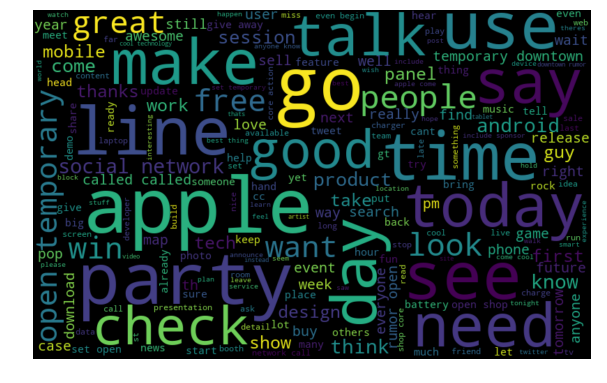

In [52]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Neutral words

In [53]:
neutral_words = ' '.join([text for text in new_df['cleaned_tweet'][new_df["emotion"] == 1]])

In [54]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)

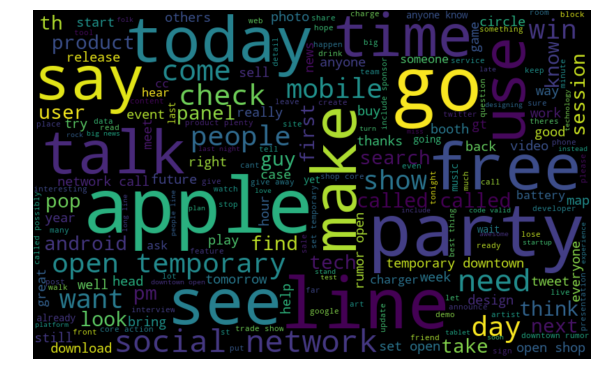

In [55]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Negative words

In [56]:
negative_words = ' '.join([text for text in new_df['cleaned_tweet'][new_df["emotion"] == 0]])

In [57]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

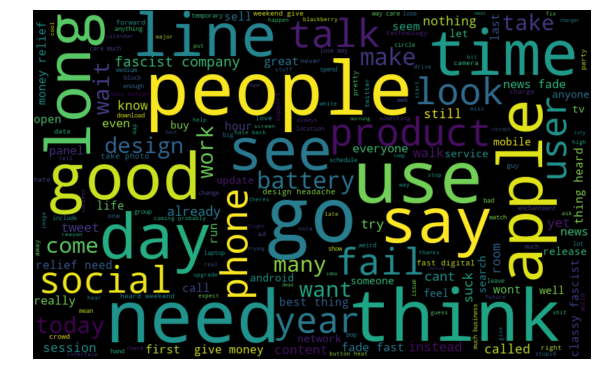

In [58]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Positive words

In [59]:
positive_words = ' '.join([text for text in new_df['cleaned_tweet'][new_df["emotion"] == 2]])

In [60]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

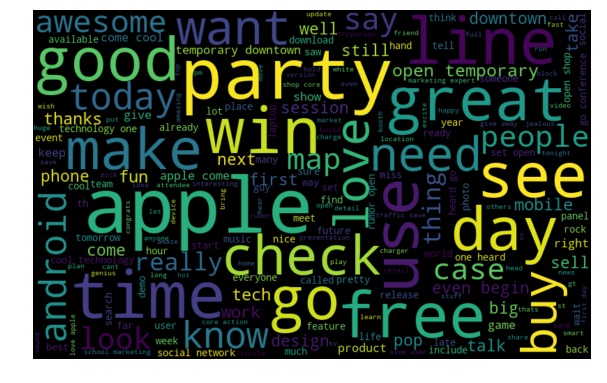

In [61]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Save the df

In [62]:
# save the new df for further use - lexicon approach
df.to_csv("1.1-sh-data-preprocessed.csv", index=False)

In [63]:
# save the new df for further use - ML approach
new_df.to_csv("2.1-sh-data-preprocessed.csv", index=False)